In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
%matplotlib inline

# Función de correlación con pesos

In [2]:
#Definimos las funciones para obtener las distancias y los histogramas

def dist2d(x_1,y_1,x_2,y_2):
    d=np.sqrt((x_2 - x_1)**2 + (y_2-y_1)**2)
    return d

def distancias2d(datos,n,Histo,tbin):
    for i in range(0,n):
        for j in range(i+1,n):
            distancia=dist2d(datos[0][i],datos[1][i], datos[0][j],datos[1][j])
            indice=int(distancia/tbin) 
            Histo[indice]=Histo[indice]+1*datos[2][i]*datos[2][j]
    return Histo

def distancias2ddr(datos,random,nd,nr,Histo,tbin):
    for i in range(0,nd):
        for j in range(0,nr):
            distancia=dist2d(datos[0][i],datos[1][i], random[0][j],random[1][j])
            indice=int(distancia/tbin) 
            Histo[indice]=Histo[indice]+1*datos[2][i]*random[2][j]
    return Histo

In [3]:
def LS(dd,rr,dr):
    name='Landy-Szlay'
    corr= (dd+rr-2*dr)/rr
    return name,corr

def He(dd,rr,dr):   
    name='Hewett'
    corr= (dd-dr)/rr
    return name,corr

def DP(dd,rr,dr):
    name='David & Peebles'
    corr= (dd/dr)-1
    return name,corr

def Ha(dd,rr,dr):
    name='Hamilton'
    corr= (dd*rr)/(dr)**2 -1
    return name,corr

In [4]:
#Sacamos las distancias entre DD, RR y DR, en 2d
def DD(datos,nd,Histo1,tbin,nDistDD):
    dd=distancias2d(datos,nd,Histo1,tbin)/nDistDD
    return dd

def RR(random,nr,Histo2,tbin, nDistRR):
    rr=distancias2d(random,nr,Histo2,tbin)/nDistRR
    return rr

def DR(datos,random,nd,nr,Histo3,tbin,nDistDR):
    dr=distancias2ddr(datos,random,nd,nr,Histo3,tbin)/nDistDR
    return dr

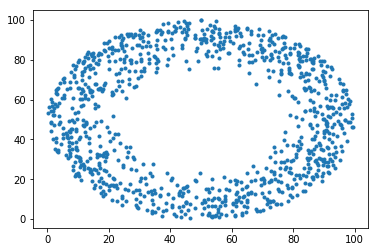

In [5]:
L=100 #tamaño de la caja
nd=1000 #Numero de datos


#Creamos datos para D=anillo en N_R=5*N_D
x_=np.zeros(nd)
y_=np.zeros(nd)
theta_=np.random.random(nd)*2*np.pi

r2=625*np.random.random(nd)
r=r2**(0.5)+25

x_=r*np.cos(theta_)+50
y_=r*np.sin(theta_)+50

datos_anillo=(x_,y_,np.zeros(nd))

plt.plot(datos_anillo[0][:],datos_anillo[1][:],'.')
for i in range(nd):
    if (datos_anillo[0][i]<50):
        datos_anillo[2][i]=1
    else:
        datos_anillo[2][i]=2      
        

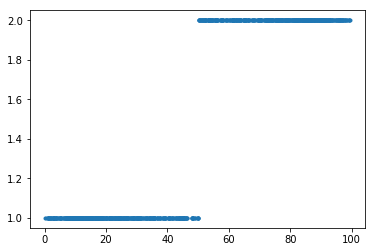

In [6]:
plt.plot(datos_anillo[0][:],datos_anillo[2][:],'.')  

In [7]:
nr=1000

random=(L*np.random.random(nr),L*np.random.random(nr),np.zeros(nr))

random[2][:].fill(1)


nbins=50 #numero de bins
dmax = np.sqrt(2*L**2) #Distancia maxima de las divisiones
dmin = 0.0 #distancia mínima
tbin = (dmax-dmin)/nbins #Tamaño del bin

Histo1=np.zeros(nbins)#Inicio del contador para el histograma
Histo2=np.zeros(nbins)
Histo3=np.zeros(nbins)

nDistDD=nd*(nd-1)/2 #Numero de pares para el arreglo 1

nDistRR=nr*(nr-1)/2 #Numero de pares para el arreglo 2

nDistDR=nd*nr #numero de distancias DR

binss=np.arange(dmin,dmax,tbin)

In [8]:
#Funciones de correlación para D=anillo


Histo1=np.zeros(nbins)#Inicio del contador para el histograma
Histo2=np.zeros(nbins)
Histo3=np.zeros(nbins)


dd=DD(datos_anillo,nd,Histo1,tbin,nDistDD)
rr=RR(random,nr,Histo2,tbin, nDistRR)
dr=DR(datos_anillo,random,nd,nr,Histo3,tbin,nDistDR)

name1_anillo,corr1_anillo=LS(dd,rr,dr)
name2_anillo,corr2_anillo=He(dd,rr,dr)
name3_anillo,corr3_anillo=DP(dd,rr,dr)
name4_anillo,corr4_anillo=Ha(dd,rr,dr)

/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


Text(0.5,1,'2PCF de D=disco')

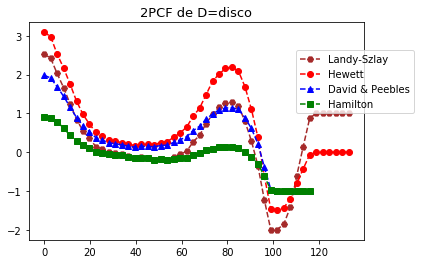

In [9]:
plt.plot(binss,corr1_anillo,'--H',label=str(name1_anillo),color='brown')
plt.plot(binss,corr2_anillo,'--o',label=str(name2_anillo),color='red')
plt.plot(binss,corr3_anillo,'--g^',label=str(name3_anillo),color='blue')
plt.plot(binss,corr4_anillo,'--s',label=str(name4_anillo),color='green')
plt.legend(bbox_to_anchor=(0.78, 0.90), loc=0, borderaxespad=0.6,prop={'size':10})
plt.title('2PCF de D=disco',fontsize=13)

## Dos anillos

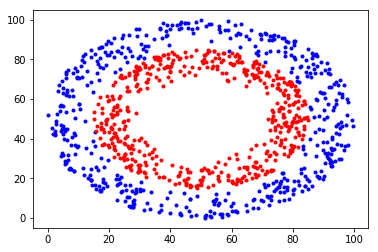

In [10]:
nd_1=500 #Numero de datos anillo 1


#Creamos datos para D=anillo1 en N_R=5*N_D
x_1=np.zeros(nd_1)
y_1=np.zeros(nd_1)
theta_1=np.random.random(nd_1)*2*np.pi

r2_1=225*np.random.random(nd_1)
r_1=r2_1**(0.5)+35

x_1=r_1*np.cos(theta_1)+50
y_1=r_1*np.sin(theta_1)+50

datos_anillo_1=(x_1,y_1,np.zeros(nd_1))

plt.plot(datos_anillo_1[0][:],datos_anillo_1[1][:],'.',color='b')

datos_anillo_1[2][:].fill(1)


nd_2=500 #Numero de datos anillo 2


#Creamos datos para D=anillo 2 en N_R=5*N_D
x_2=np.zeros(nd_2)
y_2=np.zeros(nd_2)
theta_2=np.random.random(nd_2)*2*np.pi

r2_2=225*np.random.random(nd_2)
r_2=r2_2**(0.5)+20

x_2=r_2*np.cos(theta_2)+50
y_2=r_2*np.sin(theta_2)+50

datos_anillo_2=(x_2,y_2,np.zeros(nd_2))

plt.plot(datos_anillo_2[0][:],datos_anillo_2[1][:],'.',color='r')

datos_anillo_2[2][:].fill(2)

In [17]:
#Unir ambos anillos

datos_anillos=np.concatenate((datos_anillo_1,datos_anillo_2),axis=1)

In [18]:
np.shape(datos_anillos)

(3, 1000)

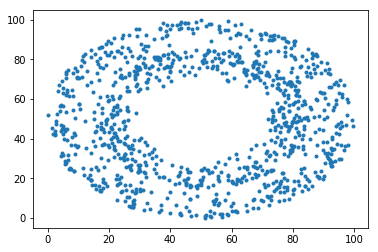

In [19]:
plt.plot(datos_anillos[0][:],datos_anillos[1][:],'.')

In [20]:
datos_anillos[2][50]

1.0

In [21]:
datos_anillos[2][700]

2.0

In [22]:
#Funciones de correlación para D=anillo


Histo1=np.zeros(nbins)#Inicio del contador para el histograma
Histo2=np.zeros(nbins)
Histo3=np.zeros(nbins)


dd=DD(datos_anillos,nd,Histo1,tbin,nDistDD)
rr=RR(random,nr,Histo2,tbin, nDistRR)
dr=DR(datos_anillos,random,nd,nr,Histo3,tbin,nDistDR)

name1_anillos,corr1_anillos=LS(dd,rr,dr)
name2_anillos,corr2_anillos=He(dd,rr,dr)
name3_anillos,corr3_anillos=DP(dd,rr,dr)
name4_anillos,corr4_anillos=Ha(dd,rr,dr)

/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


Text(0.5,1,'2PCF de D=anillos')

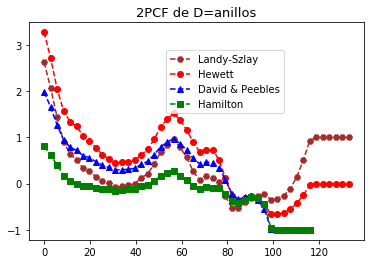

In [23]:
plt.plot(binss,corr1_anillos,'--H',label=str(name1_anillos),color='brown')
plt.plot(binss,corr2_anillos,'--o',label=str(name2_anillos),color='red')
plt.plot(binss,corr3_anillos,'--g^',label=str(name3_anillos),color='blue')
plt.plot(binss,corr4_anillos,'--s',label=str(name4_anillos),color='green')
plt.legend(bbox_to_anchor=(0.78, 0.90), loc=0, borderaxespad=0.6,prop={'size':10})
plt.title('2PCF de D=anillos',fontsize=13)

### Sin pesos:

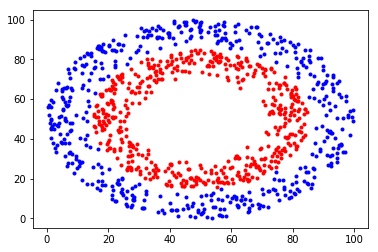

In [24]:
nds_1=500 #Numero de datos anillo 1


#Creamos datos para D=anillo1 en N_R=5*N_D
xs_1=np.zeros(nds_1)
ys_1=np.zeros(nds_1)
thetas_1=np.random.random(nds_1)*2*np.pi

r2s_1=225*np.random.random(nds_1)
rs_1=r2s_1**(0.5)+35

xs_1=rs_1*np.cos(thetas_1)+50
ys_1=rs_1*np.sin(thetas_1)+50

datos_anillo_1s=(xs_1,ys_1,np.zeros(nds_1))

plt.plot(datos_anillo_1s[0][:],datos_anillo_1s[1][:],'.',color='b')

datos_anillo_1s[2][:].fill(1)


nds_2=500 #Numero de datos anillo 2


#Creamos datos para D=anillo 2 en N_R=5*N_D
xs_2=np.zeros(nds_2)
ys_2=np.zeros(nds_2)
thetas_2=np.random.random(nds_2)*2*np.pi

r2s_2=225*np.random.random(nds_2)
rs_2=r2s_2**(0.5)+20

xs_2=rs_2*np.cos(thetas_2)+50
ys_2=rs_2*np.sin(thetas_2)+50

datos_anillo_2s=(xs_2,ys_2,np.zeros(nds_2))

plt.plot(datos_anillo_2s[0][:],datos_anillo_2s[1][:],'.',color='r')

datos_anillo_2s[2][:].fill(1)

In [25]:
datos_anilloss=np.concatenate((datos_anillo_1s,datos_anillo_2s),axis=1)

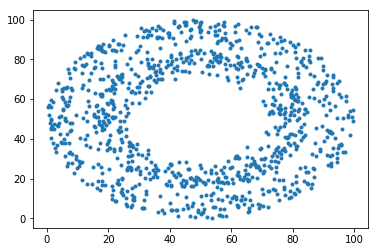

In [26]:
plt.plot(datos_anilloss[0][:],datos_anilloss[1][:],'.')

In [27]:
Histo1=np.zeros(nbins)#Inicio del contador para el histograma
Histo2=np.zeros(nbins)
Histo3=np.zeros(nbins)


dd=DD(datos_anilloss,nd,Histo1,tbin,nDistDD)
rr=RR(random,nr,Histo2,tbin, nDistRR)
dr=DR(datos_anilloss,random,nd,nr,Histo3,tbin,nDistDR)

name1_anilloss,corr1_anilloss=LS(dd,rr,dr)
name2_anilloss,corr2_anilloss=He(dd,rr,dr)
name3_anilloss,corr3_anilloss=DP(dd,rr,dr)
name4_anilloss,corr4_anilloss=Ha(dd,rr,dr)

/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


Text(0.5,1,'2PCF de D=anillos sin pesos')

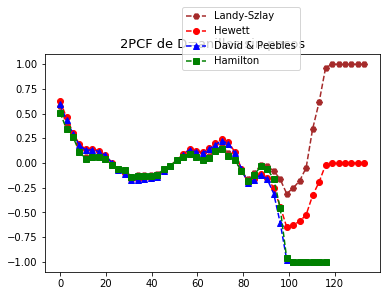

In [28]:
plt.plot(binss,corr1_anilloss,'--H',label=str(name1_anilloss),color='brown')
plt.plot(binss,corr2_anilloss,'--o',label=str(name2_anilloss),color='red')
plt.plot(binss,corr3_anilloss,'--g^',label=str(name3_anilloss),color='blue')
plt.plot(binss,corr4_anilloss,'--s',label=str(name4_anilloss),color='green')
plt.legend(bbox_to_anchor=(0.78, 0.90), loc=0, borderaxespad=0.6,prop={'size':10})
plt.title('2PCF de D=anillos sin pesos',fontsize=13)

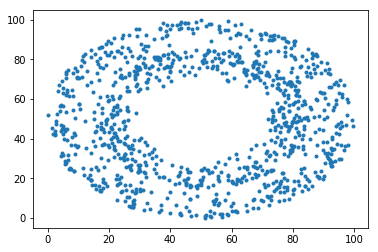

In [48]:
plt.plot(datos_anillo[0][:],datos_anillo[1][:],'.')

In [37]:
f1 = interp1d(datos_anillo[0][:], datos_anillo[1][:])

In [44]:
xnew=np.linspace(1,99,1000)

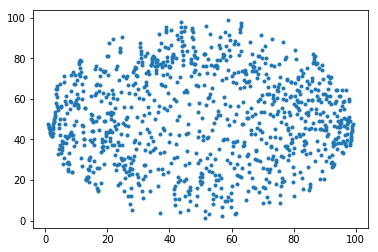

In [47]:
plt.plot(xnew,f1(xnew),'.')

#Esto no se parece mucho al anillo (?)